In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# Homework 7
# Emily Walla

In [3]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from Readfile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass import CenterOfMass



In [4]:
def OrbitCOM(galaxy, start, end, n):
    
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy: the name of the galaxy, input as string, eg: "MW"
        start: the number of the first snapshot to be read
        end: the number of the last snapshot to be read
        n: an integer indicating the intervals over which COM is returned
          
    returns: a text file containing the time, x, y, z, vx, vy, vz of that time
    """
    
    # compose the filename for output
    fileout = "Orbit_%s" %galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    if galaxy == "M33":
        delta = 0.1
        VolDec = 4
    else:
        delta = 0.1
        VolDec = 10
        
    # generate the snapshot id sequence 
    snap_ids = np.arange(start,end,n)
    #print(snap_ids[10:15])
    # it is always a good idea to also check if the input is eligible (not required)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids),7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        if snap_ids[i] < 9.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_00" + str(snap_ids[i]) + ".txt"
        elif snap_ids[i] < 99.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_0" + str(snap_ids[i]) + ".txt"
        elif snap_ids[i] > 99.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_" + str(snap_ids[i]) + ".txt"
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename,2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        GalCOMP = COM.COM_P(delta, VolDec)
        GalCOMV = COM.COM_V(GalCOMP[0],GalCOMP[1],GalCOMP[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value)
        orbit[i] = COM.time, GalCOMP[0], GalCOMP[1], GalCOMP[2], GalCOMV[0], GalCOMV[1], GalCOMV[2]
        # note that you can store 
        # a[i] = var1, *tuple(array1)

        
        # print snap_id to see the progress
        # only print every 50 to ensure that it's working
        if snap_ids[i] % 50 == 0:
            print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, header="t x y z vx vy vz", comments="#", fmt=["%.2f","%.2f","%.2f","%.2f","%.2f","%.2f","%.2f"])

In [6]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5

#MW = OrbitCOM("MW",0,800,5)
#M31 = OrbitCOM("M31",0,800,5)
M33 = OrbitCOM("M33",0,800,5)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


In [7]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
#MWt, MWx, MWy, MWz, MWvx, MWvy, MWvz = np.genfromtxt("Orbit_MW.txt",delimiter=" ", unpack = True)
#M31t, M31x, M31y, M31z, M31vx, M31vy, M31vz = np.genfromtxt("Orbit_M31.txt",delimiter=" ", unpack = True)
M33t, M33x, M33y, M33z, M33vx, M33vy, M33vz = np.genfromtxt("Orbit_M33.txt",delimiter=" ", unpack = True)

In [8]:
# create arrays of position vectors.
#MW_pos = np.array([MWx,MWy,MWz])
#M31_pos = np.array([M31x,M31y,M31z])
M33_pos = np.array([M33x,M33y,M33z])

# check that it actually prints out x, y, z coords
#print(MW_pos[:,3])

In [9]:
# create arrays of velocity vectors
#MW_vel = np.array([MWvx,MWvy,MWvz])
#M31_vel = np.array([M31vx,MWvy,MWvz])
M33_vel = np.array([M33vx,M33vy,M33vz])

In [10]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

def Difference(a,b):
    # inputs
    #     a: a 3D vector"
    #     b: another 3D vector
    
    # returns: the magnitude of the difference between the two vectors

    diff_1 = a[0]-b[0]
    diff_2 = a[1]-b[1]
    diff_3 = a[2]-b[2]
    diff_mag = np.sqrt( (diff_1**2)+(diff_2**2)+(diff_3**2) )
    return diff_mag

def v_disp(a,b,c):
    v = np.sqrt(a**2+b**2+c**2)
    avg_v = np.sum(v)/len(v)
    v_disp = np.zeros_like(v)
        

    for i in range(len(v)):
        v_disp[i] = (v[i]-avg_v)**2
            
    return np.sqrt(np.sum(v_disp)/len(v))


ValueError: x and y must have same first dimension, but have shapes (160,) and (1,)

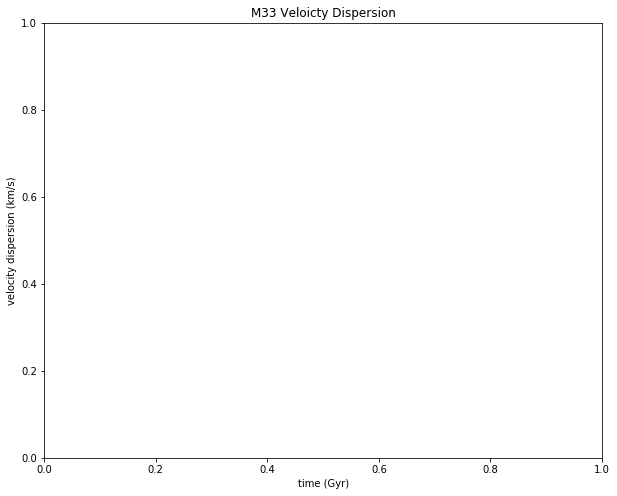

In [12]:
M33_v_disp = np.zeros
v_disp(M33_vel[:,0],M33_vel[:,1],M33_vel[:,2])

plt.figure(figsize=(10,8))
plt.title("M33 Veloicty Dispersion")
plt.ylabel("velocity dispersion (km/s)")
plt.xlabel("time (Gyr)")
plt.plot(M33t/10e2,M33_v_disp)
plt.grid()

In [ ]:
# make empty arrays for the relative distances
MW_M31_pos = np.zeros(160)
M31_M33_pos = np.zeros(160)
# make empty arrays for relative velocities
MW_M31_vel = np.zeros(160)
M31_M33_vel = np.zeros(160)


In [ ]:
# Determine the magnitude of the relative position and velocities 


for i in range(160):
    
    # of MW and M31
    MW_M31_pos[i] = Difference(MW_pos[:,i],M31_pos[:,i])
    MW_M31_vel[i] = Difference(MW_vel[:,i],M31_vel[:,i])
    
    # of M33 and M31
    M31_M33_pos[i] = Difference(M31_pos[:,i],M33_pos[:,i])
    M31_M33_vel[i] = Difference(M31_vel[:,i],M33_vel[:,i])



In [ ]:
# Plot the Orbit of the galaxies 
#################################r
plt.figure(figsize=(10,8))
plt.title("Galaxy Relative positions")
plt.ylabel("magnitude of separation (kpc)")
plt.xlabel("time (Gyr)")
plt.plot(MWt/10e2,MW_M31_pos, label="MW-M31")
plt.plot(M31t/10e2,M31_M33_pos, label="M31-M33")
plt.plot(M31t[125]/1000,M31_M33_pos[125],"o",label="Apocenter 2")
plt.plot(M31t[105]/1000,M31_M33_pos[105],"o",label="Apocenter 1")
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Plot the orbital velocities of the galaxies 
#################################
plt.figure(figsize=(10,8))
plt.title("Orbital Velocities")
plt.ylabel("velocity (km/s)")
plt.xlabel("time (Gyr)")
plt.plot(MWt/1000,MW_M31_vel, label="MW-M31")
plt.plot(M31t/1000,M31_M33_vel, label="M31-M33")

plt.legend()
plt.grid()
plt.show()

### Questions

#### 1. How many close encounters will MW and M31 Experience in the future?

   2, or 3 if you count the merge as a close encounter
    
#### 2. How is the time evolution of the separation and relative velocity related?

 They are inversely related -- when the galaxies draw apart, their relative velocity increases. When they draw close again, their relative velocity decreases.
 
#### 3. When do M31 and the MW Merge?

My simulation shows the two galaxies merging at approximately 6.75 Gyrs

#### 4. What is the decay rate of M33's orbit?

Roughly -1 pc/Gyr. That's really slow. It'll take another 75 billion years to merge with M31+MW if the rate is constant.

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Relative velocities and positions, support for Question 2")
plt.plot(M31t/1000,MW_M31_vel,"--" ,label="MW-M31 velocity")
plt.plot(M31t/1000,MW_M31_pos,label="MW-M31 position")
plt.plot(M31t/1000,M31_M33_vel, "--" ,label="M31-M33 vel")
plt.plot(M31t/10e2,M31_M33_pos, label="M31-M33 pos")
plt.xlabel("time (Gyr)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Support for Question 3")
plt.ylabel("log(magnitude of separation (kpc))")

plt.grid()
plt.xlabel("time (Gyr)")
plt.plot(MWt/10e2,MW_M31_pos, label="MW-M31")
plt.show()

plt.figure(figsize=(10,8))
plt.title("Zoom-in on MW-M31 merger")
plt.ylabel("magnitude of separation (kpc)")
plt.xlim(6,10)
plt.grid()
plt.xlabel("time (Gyr)")
plt.plot(MWt/10e2,MW_M31_pos, label="MW-M31")
plt.show()

In [ ]:
# calculate the decay rate of M33's orbit after 6 Gyrs
decay_rate = ((M31_M33_pos[105]-M31_M33_pos[125])*10**3)/((M33t[105]-M33t[125])*(10**9))
print(decay_rate)